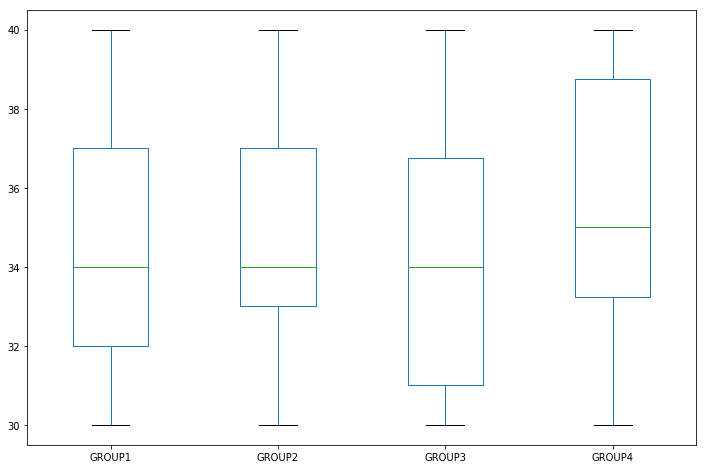

In [2]:
# load packages
import pandas as pd
# load data file
d = pd.read_csv("1SAVSM.CSV")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['GROUP1', 'GROUP2', 'GROUP3', 'GROUP4'], grid=False, figsize=(12, 8))

In [3]:
import scipy.stats as stats

In [4]:
fvalue, pvalue = stats.f_oneway(d['GROUP1'], d['GROUP2'], d['GROUP3'], d['GROUP4'])
print(fvalue, pvalue)

0.7357970215113072 0.5327311577436407


In [5]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['GROUP1', 'GROUP2', 'GROUP3', 'GROUP4'])

In [7]:
d_melt.columns = ['index', 'treatments', 'value']

In [9]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),20.7,3.0,0.735797,0.532731
Residual,1087.8,116.0,NaN,NaN


In [10]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
GROUP1 GROUP2   0.3    -1.7612 2.3612 False 
GROUP1 GROUP3 -0.0333  -2.0945 2.0278 False 
GROUP1 GROUP4   1.0    -1.0612 3.0612 False 
GROUP2 GROUP3 -0.3333  -2.3945 1.7278 False 
GROUP2 GROUP4   0.7    -1.3612 2.7612 False 
GROUP3 GROUP4  1.0333  -1.0278 3.0945 False 
--------------------------------------------


In [11]:
# load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9548423886299133 0.0004984034458175302


In [12]:
# load packages
import scipy.stats as stats
w, pvalue = stats.bartlett(d['GROUP1'], d['GROUP2'], d['GROUP3'], d['GROUP4'])
print(w, pvalue)

0.9519687081093341 0.8128718341839215
